In [1]:
# HIDDEN
import warnings
warnings.filterwarnings('ignore')
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats

## Multivariate Normal Vectors ##

Let $Z_1, Z_2, \ldots, Z_n$ be i.i.d. standard normal variables and let $\mathbf{Z} = [Z_1 ~ Z_2 \cdots Z_n]^T$. 

We know that every linear combination of the elements of $\mathbf{Z}$ is normal. We will now look at multiple linear combinations.

Let $\mathbf{A}$ be an $m \times n$ matrix of real numbers and let $\mathbf{b}$ be an $m \times 1$ real vector. The $m \times 1$ linear transformation $\mathbf{X} = \mathbf{AZ} + \mathbf{b}$ is called a *multivariate normal* random vector.

For example, consider the *bivariate* case where $n=2$, and let

$$
\mathbf{X} ~ = ~ 
\begin{bmatrix}
X_1 \\
X_2
\end{bmatrix}
~ = ~ 
\begin{bmatrix}
Z_1 \\
Z_1 + Z_2
\end{bmatrix}
$$

This is the linear transformation $\mathbf{AZ} + \mathbf{b}$ where $\mathbf{b}=0$ and 

$$
\mathbf{A} ~ = ~ 
\begin{bmatrix}
1 & 0 \\
1 & 1
\end{bmatrix}
$$

A scatter plot of simulated values of $\mathbf{X}$ is shown below. Notice the oval shape that is familiar from Data 8. 

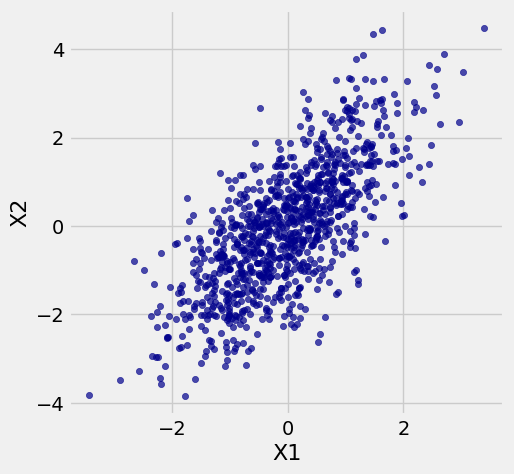

In [2]:
z1 = stats.norm.rvs(size=1000)
z2 = stats.norm.rvs(size=1000)
x = Table().with_columns(
    'X1', z1,
    'X2', z1+z2
)
x.scatter('X1', 'X2')

Later in this chapter you will see how the oval shape arises. For now, let us see what the definition of a multivariate normal vector implies.

### Linear Transformation ###

If $\mathbf{X}$ is a multivariate normal vector, then it is a linear transformation of a vector $\mathbf{Z}$ of i.i.d. standard normal variables. Therefore any linear transformation of $\mathbf{X}$ is another linear transformation of $\mathbf{Z}$ and hence is also multivariate normal.

In other words, **a linear transformation of a multivariate normal vector is also multivariate normal.** In particular, every linear combination of elements of $\mathbf{X}$ is normal.

The mean and variance of the linear transformation follow from properties of means and variances – the fact that $\mathbf{X}$ is multivariate normal doesn't matter. We can use properties of means and variances to find the mean vector and covariance matrix of any linear transformation of $\mathbf{X}$, in terms of the mean vector $\boldsymbol{\mu}$ and covariance matrix $\boldsymbol{\Sigma}$ of $\mathbf{X}$.

What we gain from $\mathbf{X}$ being multivariate normal are the *shapes* of the distributions of linear transformations: they are normal. This allows us to find probabilities using the normal curve.

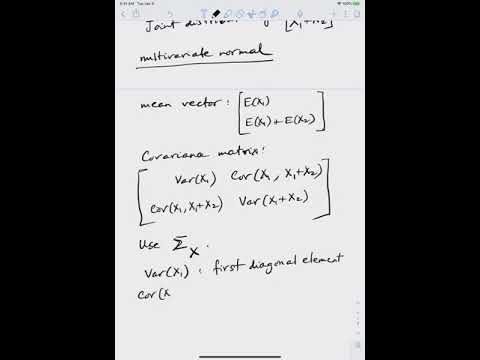

In [3]:
# VIDEO: Linear Combinations
from IPython.display import YouTubeVideo

YouTubeVideo('j6xxeJ3r4iU')

Here is an example in two dimensions.

### Sum and Difference ###

Let $\mathbf{X} = [X_1 ~ X_2]^T$ be a bivariate normal random vector with mean vector $\boldsymbol{\mu} = [\mu_1 ~ \mu_2]^T$ and covariance matrix $\boldsymbol{\Sigma}$.

Consider the sum $S = X_1 + X_2$ and the difference $D = X_1 - X_2$. Since the vector $[S ~ D]^T$ is a linear transformation of $\mathbf{X}$, we can make the following conclusions.

- The distribution of $S$ is normal. Its mean and variance can be derived from properties of means and variances by familiar calculations. The mean is $\mu_1 + \mu_2$ and the variance is

$$
Var(S) ~ = ~ Var(X_1) + Var(X_2) + 2Cov(X_1, X_2)
$$

which you can calculate based on $\boldsymbol{\Sigma}$.

Since the distribution of $S$ is normal with a known mean and variance, you can find probabilities of events determined by $S$, such as $P(S > s)$.

- The distribution of $D$ is normal with mean $\mu_1 - \mu_2$ and variance

$$
Var(D) ~ = ~ Var(X_1) + Var(X_2) - 2Cov(X_1, X_2)
$$

Since the distribution of $D$ is normal with a known mean and variance, you can find probabilities of events determined by $D$, such as $P(X_1 > X_2) = P(D > 0)$.

- The vector $[S ~ D]^T$ is bivariate normal. We found the mean vector and all but one element of the covariance matrix in the calculations above. The remaining element is

$$
Cov(S, D) ~ = ~ Cov(X_1 + X_2, X_1 - X_2) ~ = ~ Var(X_1) - Var(X_2)
$$

by bilinearity and symmetry of covariance.

### Marginals ###

Let $\mathbf{X}$ be multivariate normal. Each component $X_i$ is a linear combination of elements of $\mathbf{X}$: the combination that has coefficient 1 at index $i$ and 0 everywhere else. So each $X_i$ has the normal distribution. The parameters of this normal distribution can be read off the mean vector and covariance matrix: $E(X_i) = \boldsymbol{\mu}(i)$ and $Var(X_i) = \boldsymbol{\Sigma}(i, i)$.

But be warned: **the converse is not true**. If all the marginals of a random vector are normal, the joint distribution need not be multivariate normal.

### A Cautionary Tale ###
The cells below show the empirical joint and marginal distributions of an interesting data set. Read the comment at the top of each cell to see what is being computed and displayed.

In [4]:
# Generate 100,000 iid standard normal points

x = stats.norm.rvs(size=100000)
y = stats.norm.rvs(size=100000)
t = Table().with_columns(
    'X', x,
    'Y', y
)

In [5]:
# Select just those where both elements have the same sign

new = t.where(t.column(0) * t.column(1) > 0)

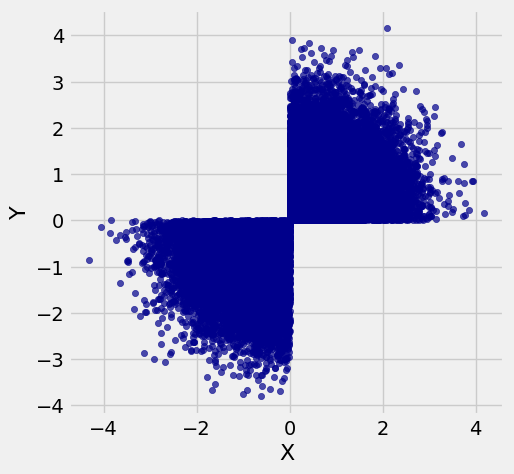

In [6]:
# The scatter of the restricted pairs
# is not oval

new.scatter(0, 1)

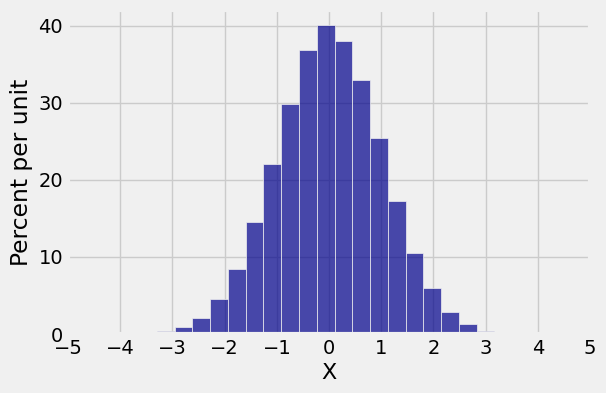

In [7]:
# Empirical distribution of horizontal coordinate

new.hist(0, bins=25)
plt.xticks(np.arange(-5, 6));

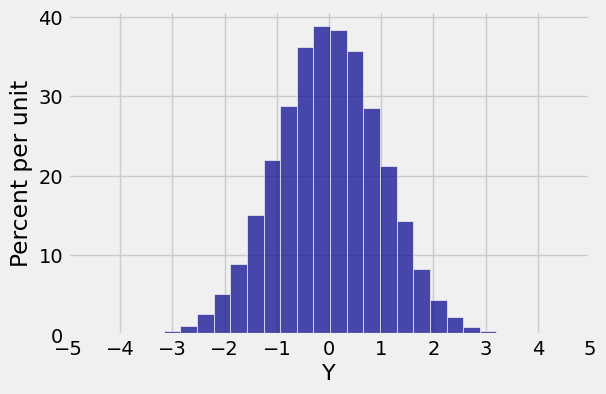

In [8]:
# Empirical distribution of vertical coordinate

new.hist(1, bins=25)
plt.xticks(np.arange(-5, 6));

Both marginals are normal but the joint distribution is far from bivariate normal. Bivariate normal variables have oval scatter plots, which these variables don't – but we haven't yet proved that bivariate normal variables have oval scatter plots.

What we do know is the sum of bivariate normal variables is normal. So let's see what the histogram of the sum of the two coordinates looks like. 

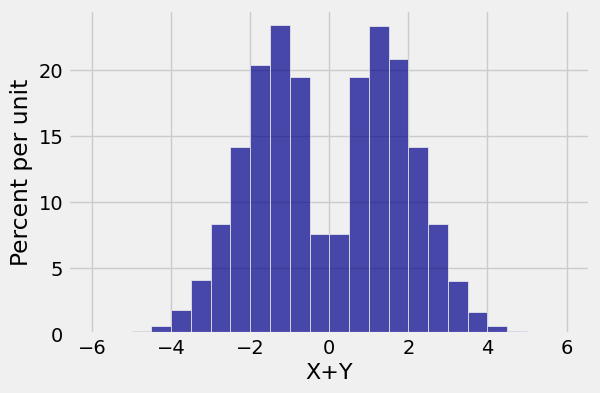

In [9]:
new = new.with_columns(
    'X+Y', new.column(0)+new.column(1))
new.hist('X+Y', bins=np.arange(-6, 6.1, 0.5))

That really isn't normal. It is bimodal with very little probability around $0$.

To get the formula for the joint density of these variables, start with the circularly symmetric joint density of two i.i.d. standard normals and restrict it to Quadrants 1 and 3. This leaves out half of the volume under the original surface, so remember to multiply by 2 to make the total volume under the new surface equal to 1.

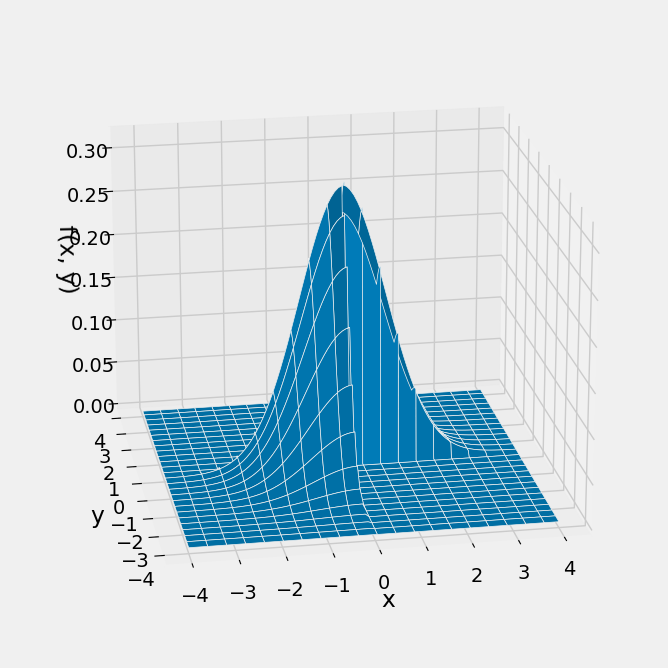

In [10]:
def new_density(x,y):
    if x*y > 0:
        return 1/np.pi * np.exp(-0.5*(x**2 + y**2))
    else:
        return 0

Plot_3d((-4, 4), (-4, 4), new_density, rstride=4, cstride=5)